## Classification for Heart Disease Dataset

## Importing the libraries

Installing required libraries

In [235]:
!pip3 install numpy
!pip3 install matplotlib    
!pip3 install pandas
!pip3 install sklearn
!pip3 install scikit-learn
!pip3 install seaborn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

## Importing the dataset

In [2]:
dataset = pd.read_csv('Data.csv')

#independent
X = dataset.iloc[:, :-1].values

#dependent
y = dataset.iloc[:, -1].values
print(X)
print(y)

[[64 66 'Male' ... 160 1.8 0.012]
 [21 94 'Male' ... 296 6.75 1.06]
 [55 64 'Male' ... 270 1.99 0.003]
 ...
 [45 85 'Male' ... 96 1.24 4.25]
 [54 58 'Male' ... 443 5.8 0.359]
 [51 94 'Male' ... 134 50.89 1.77]]
['negative' 'positive' 'negative' ... 'positive' 'positive' 'positive']


In [3]:
len(dataset)

1319

In [4]:
dataset.head()

,age,impulse,gender,pressurehight,pressurelow,glucose,CK-MB,troponin,class
0,64,66,Male,160,83,160,1.80,0.012,negative
1,21,94,Male,98,46,296,6.75,1.060,positive
2,55,64,Male,160,77,270,1.99,0.003,negative
3,64,70,Male,120,55,270,13.87,0.122,positive
4,55,64,Male,112,65,300,1.08,0.003,negative


In [5]:
dataset.describe()

,age,impulse,pressurehight,pressurelow,glucose,CK-MB,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,76.062168,127.170584,72.269143,146.634572,15.274306,0.360942
std,13.647315,15.350456,26.122720,14.033924,74.923349,46.327083,1.154568
min,14.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,135.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   impulse        1319 non-null   int64  
 2   gender         1319 non-null   object 
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   int64  
 6   CK-MB          1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(2), int64(5), object(2)
memory usage: 92.9+ KB


In [7]:
dataset.dtypes

age                int64
impulse            int64
gender            object
pressurehight      int64
pressurelow        int64
glucose            int64
CK-MB            float64
troponin         float64
class             object
dtype: object

In [8]:
dataset.isnull().any()

age              False
impulse          False
gender           False
pressurehight    False
pressurelow      False
glucose          False
CK-MB            False
troponin         False
class            False
dtype: bool

## Preprocessing

Encoding Gender Column

In [9]:
le = LabelEncoder()

X[:, 2] = le.fit_transform(X[:, 2])
X

array([[64, 66, 1, ..., 160, 1.8, 0.012],
       [21, 94, 1, ..., 296, 6.75, 1.06],
       [55, 64, 1, ..., 270, 1.99, 0.003],
       ...,
       [45, 85, 1, ..., 96, 1.24, 4.25],
       [54, 58, 1, ..., 443, 5.8, 0.359],
       [51, 94, 1, ..., 134, 50.89, 1.77]], dtype=object)

Split the dataset into training and testing sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train shape => ', X_train.shape)
print('y_train shape => ', y_train.shape)
print('X_test shape => ', X_test.shape)
print('y_test shape =>', y_test.shape)

X_train shape =>  (1055, 8)
y_train shape =>  (1055,)
X_test shape =>  (264, 8)
y_test shape => (264,)


Robust Scaling

In [11]:
rs = RobustScaler()
X_train = rs.fit_transform(X_train)
X_test = rs.transform(X_test)

print("Training Data After Scaling:")
print(X_train)

print("\nTesting Data After Scaling:")
print(X_test)

Training Data After Scaling:
[[-0.88888889  0.37209302  0.         ... -0.23684211  0.64963504
  -0.13414634]
 [ 1.          2.74418605  0.         ... -0.31578947 -0.10218978
   0.20731707]
 [ 0.11111111 -0.3255814   0.         ... -0.13157895 -0.4649635
   5.02439024]
 ...
 [-0.44444444  0.18604651 -1.         ...  3.93421053  3.44525547
  -0.1097561 ]
 [-0.22222222 -0.13953488  0.         ...  0.14473684  0.04379562
  -0.08536585]
 [ 2.5        -0.88372093 -1.         ...  0.44736842 11.96350365
   0.36585366]]

Testing Data After Scaling:
[[ 1.00000000e+00 -9.30232558e-02  0.00000000e+00 ...  3.68421053e-01
   7.17055961e+01  1.21951220e-01]
 [-1.55555556e+00 -3.25581395e-01 -1.00000000e+00 ... -3.02631579e-01
   2.77372263e-01 -1.34146341e-01]
 [-4.44444444e-01 -5.58139535e-01  0.00000000e+00 ... -6.57894737e-02
  -5.83941606e-02 -9.75609756e-02]
 ...
 [ 5.55555556e-01  3.25581395e-01 -1.00000000e+00 ...  5.65789474e-01
  -4.20924574e-01  8.04878049e-01]
 [ 3.88888889e-01 -3.25581

In [12]:
print(X_train[:, 1].min())
print(X_train[:, 1].max())

-2.558139534883721
2.7906976744186047


## Training the model

Traning using KNN

In [13]:
classifier = KNeighborsClassifier(n_neighbors = 15, metric = 'minkowski', p = 2)

classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

## Testing the model

Predicted results Vs. Actual (Testing) results

In [14]:
print("Prdecting Vs. Actual")
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

Prdecting Vs. Actual
[['positive' 'positive']
 ['negative' 'negative']
 ['negative' 'negative']
 ['negative' 'negative']
 ['negative' 'positive']
 ['positive' 'positive']
 ['positive' 'positive']
 ['positive' 'positive']
 ['positive' 'positive']
 ['negative' 'positive']
 ['negative' 'negative']
 ['negative' 'negative']
 ['positive' 'positive']
 ['positive' 'positive']
 ['positive' 'positive']
 ['negative' 'negative']
 ['positive' 'positive']
 ['negative' 'positive']
 ['negative' 'negative']
 ['negative' 'negative']
 ['negative' 'negative']
 ['positive' 'negative']
 ['negative' 'positive']
 ['positive' 'positive']
 ['positive' 'positive']
 ['negative' 'positive']
 ['positive' 'negative']
 ['positive' 'negative']
 ['positive' 'positive']
 ['negative' 'negative']
 ['negative' 'negative']
 ['negative' 'negative']
 ['positive' 'positive']
 ['negative' 'negative']
 ['positive' 'positive']
 ['negative' 'negative']
 ['positive' 'positive']
 ['positive' 'positive']
 ['negative' 'negative']
 ['p

## Predicting the output of a new value

In [15]:
print("Prdecting new result:")
new_data_scaled_1 = rs.transform([[50, 63, 1, 160, 72, 100, 0.7, 0.004]])
new_data_scaled_2 = rs.transform([[60, 77, 1, 160, 50, 150, 2.7, 1.03]])
print(classifier.predict(new_data_scaled_1))
print(classifier.predict(new_data_scaled_2))

Prdecting new result:
['negative']
['positive']


## Evaluating the model

Confusion Matrix

In [16]:
conf_matrix  = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[ 90  11]
 [ 31 132]]


Accuracy Score

In [17]:
accuracy_score(y_test, y_pred)

0.8409090909090909

## Visualizing the model

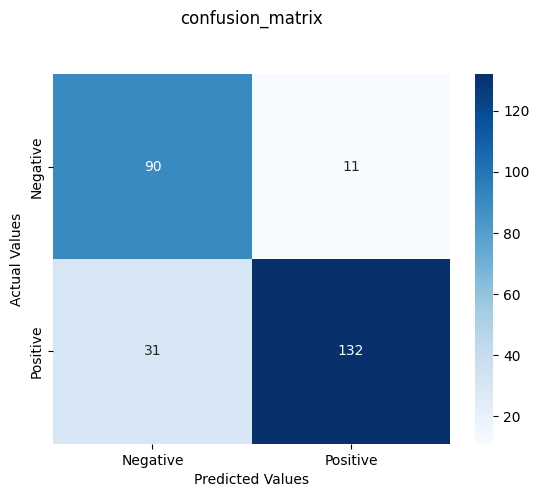

In [18]:
ax = sns.heatmap(conf_matrix, annot=True, fmt=".0f", cmap="Blues")

ax.set_title('confusion_matrix' + '\n\n')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

plt.show()